# Name : Fernando I.A.M.D.
# Index No.: 190172K

In [2]:
import cv2
import numpy as np
import sympy
import matplotlib.pyplot as plt
%matplotlib inline 

## Q1

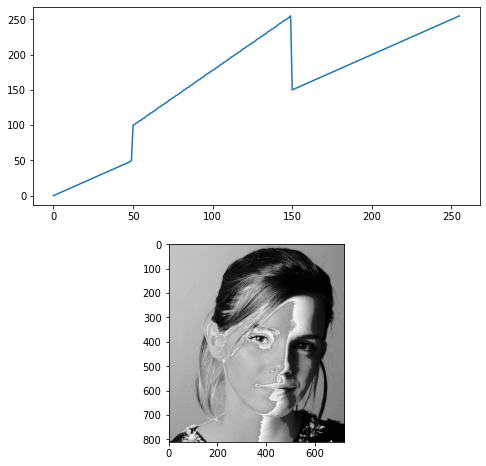

In [5]:
img = cv2.imread("emma_gray.jpg",cv2.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256
g = cv2.LUT(img,t)

g = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)
fig, ax  = plt.subplots(2,1,figsize = (8,8))
ax[0].plot(t)
ax[1].imshow(g)

## Q2

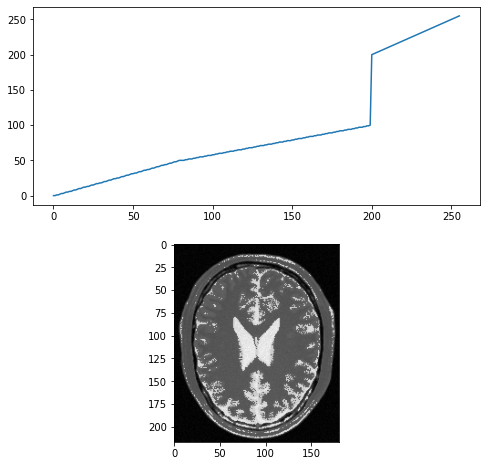

In [28]:
img = cv2.imread("brain_proton_density_slice.png",cv2.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,80)
t2 = np.linspace(50,100,120)
t3 = np.linspace(200,255,56)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256
g = cv2.LUT(img,t)

g = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)
fig, ax  = plt.subplots(2,1,figsize = (8,8))
ax[0].plot(t)
ax[1].imshow(g)

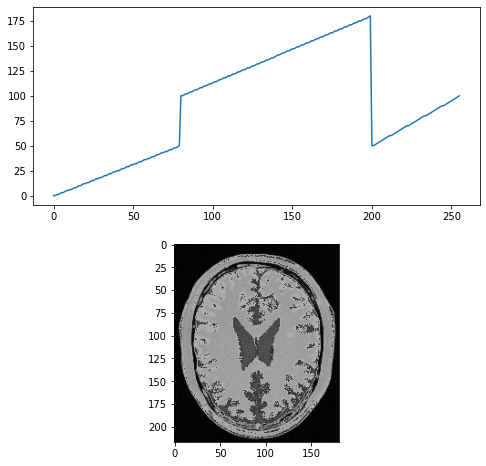

In [29]:
img = cv2.imread("brain_proton_density_slice.png",cv2.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,80)
t2 = np.linspace(100,180,120)
t3 = np.linspace(50,100,56)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256
g = cv2.LUT(img,t)

g = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)
fig, ax  = plt.subplots(2,1,figsize = (8,8))
ax[0].plot(t)
ax[1].imshow(g)